# Linear Regression

16307110216 何瑞安

### Extract data from downloaded files

In [207]:
import warnings

warnings.filterwarnings("ignore")


from sklearn.datasets import load_boston

boston_dataset = load_boston()
X = boston_dataset['data']
y = boston_dataset['target']

print(X.shape,y.shape)

(506, 13) (506,)


In [208]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

### Visualize and Preprocess the data

In [209]:
import numpy as np
from sklearn.model_selection import train_test_split

n_splits = 5

X_norm = (X - np.mean(X,axis=0))/np.std(X,axis=0)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2) 
X_train_poly = np.hstack([X_train,np.power(X_train,2),np.power(X_train,3),np.power(X_train,4),np.power(X_train,5)])
X_test_poly  = np.hstack([X_test,np.power(X_test,2),np.power(X_test,3),np.power(X_test,4),np.power(X_test,5)])
print(X_train.shape,X_train_poly.shape,y_train.shape)

(404, 13) (404, 65) (404,)


### Ridge Regression Model

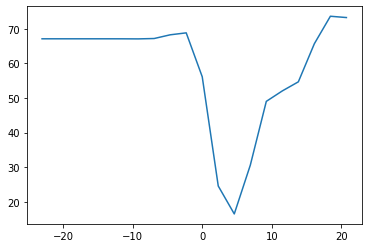

In [210]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold

alpha_range = np.power(10.0,range(-10,10,1))
avg_error = []

kf = KFold(n_splits=n_splits)

for alpha in alpha_range:
    tot_error = 0
    for train_index, test_index in kf.split(X_train_poly):
        X_train_kf, X_test_kf = X_train_poly[train_index], X_train_poly[test_index]
        y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
        rid = linear_model.Ridge(alpha=alpha)
        rid.fit(X_train_kf,y_train_kf)
        y_pred_kf = rid.predict(X_test_kf)
        tot_error += mean_squared_error(y_pred_kf,y_test_kf)
    avg_error.append(tot_error/n_splits)

fig,ax = plt.subplots()
ax.plot(np.log(alpha_range),avg_error)
fig.savefig('rr_kfold.png')

In [211]:
print(list(zip(alpha_range,avg_error)))

[(1e-10, 67.07559819619189), (1e-09, 67.07559773071272), (1e-08, 67.07559308725729), (1e-07, 67.0755466574882), (1e-06, 67.07508550753316), (1e-05, 67.07077102495269), (0.0001, 67.04771940709729), (0.001, 67.15690113333747), (0.01, 68.227024198216), (0.1, 68.79133657603106), (1.0, 56.10355291741549), (10.0, 24.543161664406377), (100.0, 16.48050923075875), (1000.0, 30.551764810422107), (10000.0, 48.9989867574074), (100000.0, 52.02080651048907), (1000000.0, 54.642754399845785), (10000000.0, 65.66271685857274), (100000000.0, 73.59123407600741), (1000000000.0, 73.21345285179613)]


In [213]:
best_alpha = alpha_range[np.argmin(avg_error)]
    
rid = linear_model.Ridge(alpha=best_alpha)
rid.fit(X_train_poly,y_train)
y_pred = rid.predict(X_test_poly)

print(best_alpha,mean_squared_error(y_pred,y_test),mean_absolute_error(y_pred,y_test))

100.0 24.654622562940393 3.2520153759867623


In [214]:
y_pred = rid.predict(X_train_poly)

print(best_alpha,mean_squared_error(y_pred,y_train),mean_absolute_error(y_pred,y_train))

100.0 11.59253640816305 2.274422660082377


### Lasso Regression Model

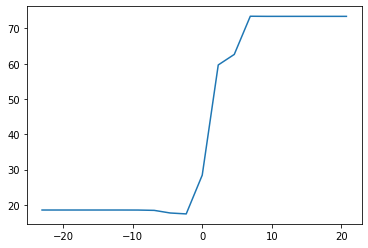

In [215]:
alpha_range = np.power(10.0,range(-10,10,1))
avg_error = []

for alpha in alpha_range:
    tot_error = 0
    for train_index, test_index in kf.split(X_train_poly):
        X_train_kf, X_test_kf = X_train_poly[train_index], X_train_poly[test_index]
        y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
        las = linear_model.Lasso(alpha=alpha)
        las.fit(X_train_kf,y_train_kf)
        y_pred_kf = las.predict(X_test_kf)
        tot_error += mean_squared_error(y_pred_kf,y_test_kf)
    avg_error.append(tot_error/n_splits)
    
fig,ax = plt.subplots()
ax.plot(np.log(alpha_range),avg_error)
fig.savefig('lr_kfold.png')

In [216]:
print(list(zip(alpha_range,avg_error)))

[(1e-10, 18.556880309621864), (1e-09, 18.55688021711064), (1e-08, 18.556879291997944), (1e-07, 18.556870040905324), (1e-06, 18.556777531178543), (1e-05, 18.555853093800927), (0.0001, 18.54663597799696), (0.001, 18.457966780842174), (0.01, 17.7132438037041), (0.1, 17.45184203693757), (1.0, 28.44068961481659), (10.0, 59.66657210319638), (100.0, 62.6532137031777), (1000.0, 73.47038247161711), (10000.0, 73.4388623715456), (100000.0, 73.4388623715456), (1000000.0, 73.4388623715456), (10000000.0, 73.4388623715456), (100000000.0, 73.4388623715456), (1000000000.0, 73.4388623715456)]


In [217]:
best_alpha = alpha_range[np.argmin(avg_error)]
    
las = linear_model.Lasso(alpha=best_alpha)
las.fit(X_train_poly,y_train)
y_pred = las.predict(X_test_poly)

print(best_alpha,mean_squared_error(y_pred,y_test),mean_absolute_error(y_pred,y_test))

0.1 23.534716537663947 3.1122861600644125


In [218]:
y_pred = las.predict(X_train_poly)

print(best_alpha,mean_squared_error(y_pred,y_train),mean_absolute_error(y_pred,y_train))

0.1 10.901421834339441 2.2657786815410925


### Decision Tree for Regression

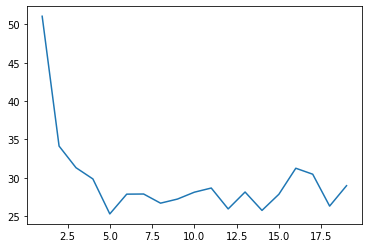

In [219]:
from sklearn import tree

depth_range = np.arange(1,20,1)
avg_error = []

for depth in depth_range:
    tot_error = 0
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
        y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
        dt = tree.DecisionTreeRegressor(max_depth=depth)
        dt = dt.fit(X_train_kf, y_train_kf)
        y_pred_kf = dt.predict(X_test_kf)
        tot_error += mean_squared_error(y_pred_kf,y_test_kf)
    avg_error.append(tot_error/n_splits)
    
fig,ax = plt.subplots()
ax.plot(depth_range,avg_error)
fig.savefig('dt_kfold.png')

In [220]:
print(list(zip(depth_range,avg_error)))

[(1, 51.04982684827222), (2, 34.135704267770606), (3, 31.318928200407548), (4, 29.853283489014512), (5, 25.298242674865513), (6, 27.872738160088737), (7, 27.89122622618162), (8, 26.6994480477312), (9, 27.23173321741823), (10, 28.1273214967434), (11, 28.66945957135838), (12, 25.949867775225478), (13, 28.152178087732864), (14, 25.75493161031318), (15, 27.860764868398483), (16, 31.24832069830247), (17, 30.47071929012345), (18, 26.318018672839507), (19, 28.97578063271605)]


In [221]:
best_depth = depth_range[np.argmin(avg_error)]

dt = tree.DecisionTreeRegressor(max_depth=best_depth)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(best_depth,mean_squared_error(y_pred,y_test),mean_absolute_error(y_pred,y_test))

5 17.7239311508573 2.883264207636746


In [222]:
y_pred = dt.predict(X_train)

print(best_depth,mean_squared_error(y_pred,y_train),mean_absolute_error(y_pred,y_train))

5 7.462483368204389 2.0997918334312757


In [223]:
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None, 
                      feature_names=boston_dataset['feature_names'],  
                      class_names='house_price',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.save()

'Source.gv'

### Orinary Linear Regression

In [180]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(mean_squared_error(y_pred,y_test),mean_absolute_error(y_pred,y_test))

18.953120216501844 3.1683146723855247
